In [1]:
!pip install matplotlib seaborn nltk gensim beautifulsoup4

1. Import Libraries


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import bs4 as bs
import urllib.request
import nltk
import gensim
from gensim.models import Word2Vec
from sklearn.decomposition import PCA

In [16]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

2.Web Scraping

In [17]:
scrapped_data = urllib.request.urlopen('https://en.wikipedia.org/wiki/Machine_learning')
article = scrapped_data.read()
parsed_article = bs.BeautifulSoup(article, 'lxml')
paragraphs = parsed_article.find_all('p')


Combine all Paragraphs

In [18]:
article_text = ''
for p in paragraphs:
  article_text += p.text

sample Text for processing

In [30]:
sentences = """Alice  opened the door and found that it led into a
small 90
passage, not much larger than a rat-hole: she knelt down and
looked along the passage into the loveliest garden you ever saw.
How she longed to get out of that dark hall, and wander about
among those beds of bright flowers and those cool fountains, but
she could not even get her head through the doorway; `and even if
my head would go through,' (thought) $poor Alice, `it would be of
very little use without my shoulders. Oh, how I wish
I could shut up like a telescope! I think I could, if I only
know how to begin.' For, you see, so many out-of-the-way things
had happened lately, that Alice had begun to think that very few
things indeed were really impossible.
"""

3.Text pre-Processing

In [31]:
try:
  cleaned_sentences = re.sub('[^A-Za-z0-9]+', ' ', sentences)
  cleaned_sentences = re.sub(r'\b\w{1}\b', '', cleaned_sentences)
  cleaned_sentences =cleaned_sentences.lower().strip()

  all_sent = nltk.sent_tokenize(cleaned_sentences)
  all_words = [nltk.word_tokenize(sent) for sent in all_sent]

  stop_words = set(nltk.corpus.stopwords.words('english'))

  for i in range(len(all_words)):
    all_words[i] = [w for w in all_words[ i] if w not in stop_words]

  data = all_words
  data1 = data[0]
  print("pre preocessing successfull. cleaned words:", data)

except Exception as e:
  print("An error occured during preprocessing :", str(e))

pre preocessing successfull. cleaned words: [['alice', 'opened', 'door', 'found', 'led', 'small', '90', 'passage', 'much', 'larger', 'rat', 'hole', 'knelt', 'looked', 'along', 'passage', 'loveliest', 'garden', 'ever', 'saw', 'longed', 'get', 'dark', 'hall', 'wander', 'among', 'beds', 'bright', 'flowers', 'cool', 'fountains', 'could', 'even', 'get', 'head', 'doorway', 'even', 'head', 'would', 'go', 'thought', 'poor', 'alice', 'would', 'little', 'use', 'without', 'shoulders', 'oh', 'wish', 'could', 'shut', 'like', 'telescope', 'think', 'could', 'know', 'begin', 'see', 'many', 'way', 'things', 'happened', 'lately', 'alice', 'begun', 'think', 'things', 'indeed', 'really', 'impossible']]


4. Train Word2Vec Model

In [32]:
model1 =gensim.models.Word2Vec(data, min_count=1, vector_size=52, window=5)

5. Find Similar Words

In [33]:
try:
  wrd = 'door'
  v1 = model1.wv[wrd]
  similar_words = model1.wv.most_similar(wrd)
  print(f"word similar to '{wrd}': ")
  for x in similar_words:
    print(x)


except KeyError as e:
  print(f"Error : The word '{wrd}' is not in the vocabulary. ")


word similar to 'door': 
('beds', 0.3647063076496124)
('90', 0.33050355315208435)
('telescope', 0.32980358600616455)
('shut', 0.25881046056747437)
('cool', 0.24296671152114868)
('like', 0.241334930062294)
('doorway', 0.2213861048221588)
('many', 0.17696242034435272)
('longed', 0.14304541051387787)
('think', 0.134453684091568)


6. Prepare Context- Target Data

In [34]:
dat =[]
for i in range(2, len(data1) - 2):
  context = [data1[ i - 2], data1[ i - 1], data1[ i + 1], data1[ i + 2]]
  target = data1[i]
  dat.append((context, target))

print("First 5 context-target pairs:")
print(dat[:5])


First 5 context-target pairs:
[(['alice', 'opened', 'found', 'led'], 'door'), (['opened', 'door', 'led', 'small'], 'found'), (['door', 'found', 'small', '90'], 'led'), (['found', 'led', '90', 'passage'], 'small'), (['led', 'small', 'passage', 'much'], '90')]


7. Word Prediction

In [35]:
i=3
print("context and target words:")
print(dat[i][0], dat[i][1])

context_vector = np.mean([model1.wv[word] for word in dat[i][0]], axis=0)

simiilar_words = model1.wv.similar_by_vector(context_vector, topn=5)
print("predicted words based on context:")
for word, score in similar_words:
  print(f"Word: {word}, Similarity Score: {score}")

context and target words:
['found', 'led', '90', 'passage'] small
predicted words based on context:
Word: beds, Similarity Score: 0.3647063076496124
Word: 90, Similarity Score: 0.33050355315208435
Word: telescope, Similarity Score: 0.32980358600616455
Word: shut, Similarity Score: 0.25881046056747437
Word: cool, Similarity Score: 0.24296671152114868
Word: like, Similarity Score: 0.241334930062294
Word: doorway, Similarity Score: 0.2213861048221588
Word: many, Similarity Score: 0.17696242034435272
Word: longed, Similarity Score: 0.14304541051387787
Word: think, Similarity Score: 0.134453684091568


8.Visualization with PCA

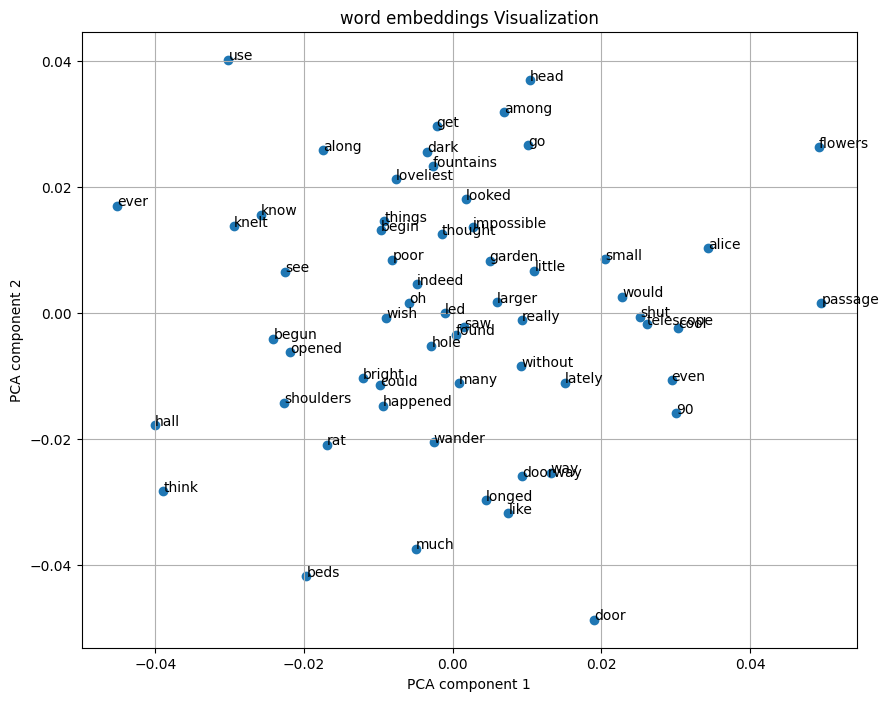

In [39]:
X = model1.wv[model1.wv.key_to_index]
pca = PCA(n_components=2)
result= pca.fit_transform(X)

plt.figure(figsize=(10, 8))
plt.scatter(result[:, 0], result[:,1])
words = list(model1.wv.key_to_index)
for i, word in enumerate(words):
  plt.annotate(word, xy=(result[i,0], result[i,1]))

plt.title("word embeddings Visualization")
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')
plt.grid()
plt.show()